Progress report (5%) – due 11:59pm on November 7th
The progress report is a chance for you to take stock of how far you have come and to reflect on whether or not you are comfortable with the substance or scope of your final project. The format of the progress report will be a Jupyter notebook that should be uploaded to the private github repository you have set up for your team. It should include:
- Include a link to your github project repository located in the Github Classroom designated for this course. We will check whether your github repository is created in the classroom set up for the course and whether all team members have been added there.

- Project introduction: an introduction that discusses the data you are analyzing, and the question or questions you are investigating.
- Any changes: a discussion whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?
- Data cleaning: show clearly how you cleaned your data.
- Exploratory data analysis: explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.
- At least one visualization that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate.
- At least one ML analysis on your dataset, along with a baseline comparison and an interpretation of the result that you obtain.
- Reflection: a discussion of the following:
    - What is the hardest part of the project that you’ve encountered so far?
    - What are your initial insights?
    - Are there any concrete results you can show at this point? If not, why not?
    - Going forward, what are the current biggest problems you’re facing?
    - Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
- Roles/Coordination (important): Who will be responsible for specific portions of the project (at least two for each portion is recommended): e.g., finding data sources, cleaning, statistical analysis, visualization, machine learning applications, etc.? What deadlines should various components of the project be completed by?
- Next steps: What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

What you need to submit: A PDF of your Jupyter notebook to Gradescope which includes a link to the notebook located in your repository (the two notebooks should look the same).

How this part will be graded: the amount of progress that has been made, clarity of exposition. There will be a grade assigned to the whole progress report that everyone receives, and a grade assigned to you individually based on your github code contributions.


Github Link: https://github.com/cs418-fa24/project-check-in-team-8 

PROJECT INTRODUCTION(MANU): 

Our project centers around analyzing NFL data from the 2024 season to uncover predictive indicators for Super Bowl success. By utilizing machine learning models, we aim to determine which team statistics correlate most strongly with playoff wins. Specifically, we’re investigating offensive stats like Passing Yards, Rushing Yards, and Receiving Yards, alongside defensive metrics such as Tackles and Interceptions, and team performance in terms of wins. This data is collected from ESPN using web scraping tools, then organized in a pandas DataFrame and exported to a CSV file for further analysis. Additionally, we’re delving into draft pick histories to evaluate the performance of quarterbacks based on their draft position, comparing higher and lower picks, and examining if backup quarterbacks outperform starters in the long run.

ANY CHANGES(MANU): 

Since our initial proposal, we’ve refined the project scope to focus more narrowly on key offensive and defensive stats, instead of incorporating a wider array of advanced metrics. After discussing with our professor, we agreed to focus on six main statistics to ensure clarity in our analysis and predictive models. We’ve also added a historical comparison of quarterback draft picks, specifically those from 2015 to 2021, to explore if lower-drafted quarterbacks outperform higher picks over time and if backup quarterbacks show better performance metrics than starters. By narrowing our scope and adding these focused research questions, we aim to produce a robust and targeted analysis of what it takes to build a Super Bowl-winning team.

DATA CLEANING(GAGE): 

Since data was collected in a collaborative effort, most of the initial work that was required for further analysis consisted of combining the respective datasets into one CSV file, as well as cleaning the data itself. The column names of various initial files contained inconsistencies which had to be dealt with prior to combining ("Pass Attempts" vs "Passing Attempts", "Cmp_Pct" vs "Completion Percentage", etc). Once these files were combined, any potential null values were checked and amended to 0, or the appropriate value.

EXPLORATORY DATA ANALYSIS(GAGE): 

Our primary goal is to explore any correlation between a quarterback’s draft position and their performance as indicated by metrics such as average QBR and win rate. The scatter plot below shows draft pick position on the x-axis and average QBR on the y-axis. A downward trend could indicate that quarterbacks picked earlier tend to have higher QBRs, while a lack of trend might suggest that draft position does not strongly correlate with QBR. Additionally, win rate and passing yards are indicated by the color and size of each dot, respectively. This visualization gives a great initial exploration of the nature of the data and give us a loose understanding from a quick glance: which is to say that quarterbacks that are drafted higher generally experience more success, indicated by their higher win rate, QBR, and passing yardage. Outliers tend to favor underdogs overperforming their value as opposed to the high draft picks failing to meet theirs.

![Draft Pick vs Avg QBR & Win Rate](DraftPickvsAvgQBRWinRate.png)

In [1]:
#ONE VISUALIZATOIN(VASU)

#import any necessary libraries here



/opt/anaconda3/lib/python3.12/site-packages/seaborn/distributions.py:413: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



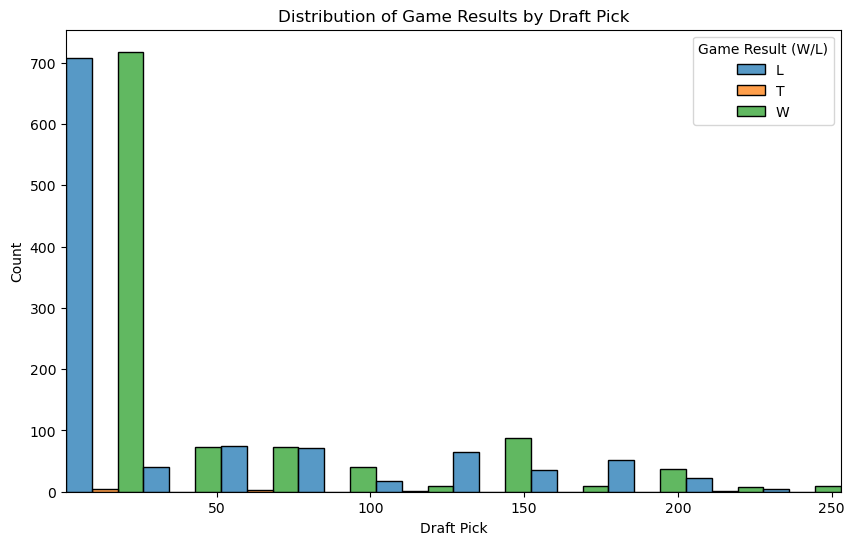

In [16]:
# Another Visualization (Shriniket)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns

nfl_stats = pd.read_csv('combinedQBStats.csv')
df = nfl_stats.groupby(["Draft Pick", "Game Result (W/L)"]).size().reset_index(name='Count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Draft Pick", weights="Count", hue="Game Result (W/L)", multiple="dodge")
plt.xlabel("Draft Pick")
plt.ylabel("Count")
plt.title("Distribution of Game Results by Draft Pick")
plt.xlim(1, df["Draft Pick"].max())
plt.show()



A Hypothesis That we had when it come to Draft Picks was whether they were Winning or Not. Our original hypothesis is that Higher Draft picks will likely lose more than they win. This hypothesis seemed to be proven somewhat incorrect as it seems to be a 50-50 chance. One other assumption we had was that QB's chosen later in the draft will likely win more, because generally good times select in the later rounds at later spots. 

In [30]:
#ML ANALYSIS(SHRINIKET AND CARLOS)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression

nfl_qb_stats = pd.read_csv('combinedQBStats.csv')

mean_qbr_by_draft_pick = nfl_qb_stats.groupby("Draft Pick")[["QBR"]].mean().reset_index()
# print(mean_qbr_by_draft_pick)
X = mean_qbr_by_draft_pick["Draft Pick"].values.reshape(-1, 1)
y = mean_qbr_by_draft_pick[["QBR"]]

## Actual Model being used
linear_regression = LinearRegression()
linear_regression.fit(X, np.ravel(y))
linear_model_predictions = linear_regression.predict(X)
print(f"Linear Model predictions {linear_model_predictions}")

## Baseline model
m = -1
b = 90
list_of_y = []
for i in X:
    y = m * (i[0]) + b
    if y < 0:
        list_of_y.append(0)
    else:
        list_of_y.append(int(y))

print(f"Baseline Model {list_of_y}")
# for i in range(1, 250):
#     print(linear_regression.predict(X))



#WRITE YOUR CODE HERE

Linear Model predictions [84.73062916 84.52711105 84.32359295 83.91655673 83.71303863 83.50952052
 82.8989662  82.6954481  82.49192999 81.88137567 79.64267651 78.42156787
 76.38638681 74.35120575 74.14768765 71.90898848 71.50195227 71.29843416
 69.67028932 69.46677121 67.22807205 66.82103583 66.41399962 66.00696341
 64.58233667 63.97178235 63.76826424 62.95419182 57.86623917 57.45920296
 56.64513054 51.9642141  51.15014167 50.94662357 50.13255114 48.7079244
 46.87626145 46.46922524 46.06218902 44.84108039 44.43404418 44.02700797
 42.80589933 40.56720016 37.92146479 34.25813888 33.44406645]
Baseline Model [89, 88, 87, 85, 84, 83, 80, 79, 78, 75, 64, 58, 48, 38, 37, 26, 24, 23, 15, 14, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Based on the "predicted" results for the baseline model and Linear regression it seems that Linear regression seems to be better suited for our dataset. We are looking for results where stats are among the highest when draft picks are higher. We are using QBR in this situation although most stats should be higher when given a high draft pick (except for interceptions). The baseline model goes to 0 after a certain arbitary draft pick, when there could always exist anomalies or outliers. Since football is such a dynamic sport, outliers are  present and linear regression accounts for this. Thus linear regression is the best ML model for this situation. 

REFLECTION(ZEESHAN): 

Some difficulties with the project so far have been the large variance within the data, as our sample size is focused on just quarterbacks over the last few years. Because of the constantly changing offensive environment in the league, it's difficult to compare across eras which means our data must be concentrated on modern QBs. This in turn limits the amount of data we can use to compare and make valid conclusions with. The initial insights we've seen have matched up with logical thinking; quarterbacks who were drafted higher have, on average, higher passer ratings. This would make sense as a higher draft pedigree usually correlates with better performance in the league. There's also a large concentration of QBs who are taken very early in the draft, thinning out in occurrence as the rounds progress. This also lines up with conventional football wisdom, which deems the quarterback the most valuable player on the team. Even those who are not worth high draft pick capital are taken earlier than an equivalent skill player because of the positional value. 

Some issues which could prevent further data exploration include the aforementioned variance within our data set, which could cause some data analysis to be flawed. This shouldn't be an issue if we focus on game-by-game stats and comparisons, as we have plenty of those. But overall career comparisons become much trickier. There's also a lot of context which is sometimes necessary to evaluate performance, which can't be quantified. Injuries can limit a start and cut the statistical numbers down, which isn't accounted for. Overall though, it should'nt pose a big issue and we are on track with our project. 

ROLES/COORDINATION(VASU): 

WRITE HERE

NEXT STEPS(YUGESH):

### Next Steps for the Upcoming Month

**1. Complete Data Cleaning and Preparation:**
   - Remove irrelevant columns and handle missing data (e.g., filling, imputing, or removing rows/columns with high amounts of missing values).
   - Standardize draft pick values, including any transformations needed to make draft position comparable across all QBs.

**2. Aggregate and Feature Engineering:**
   - Aggregate each quarterback's performance statistics across all games or seasons to create a "career performance" metric for each QB.
   - Create draft pick tiers or ranks (e.g., high, mid, low) to facilitate comparison across draft positions.
   
**3. Conduct Exploratory Data Analysis (EDA):**
   - Visualize distributions of draft picks and long-term performance statistics.
   - Generate initial insights on relationships between draft position and QB performance metrics (e.g., average passing yards, touchdowns).

**4. Statistical Testing and Modeling:**
   - Perform correlation analysis and hypothesis testing to identify if higher draft picks show statistically significant differences in performance.
   - If feasible, develop a simple predictive model to quantify the impact of draft position on long-term performance.

### Evaluation of Project Success

The project will be considered successful if:
1. We can identify any statistically significant trends or relationships between draft position and QB performance.
2. We produce a clear, data-driven answer to the core question: **Do higher-drafted QBs tend to perform better in the long run?**
3. We generate a final report or presentation summarizing findings, visualizations, and statistical analysis that clearly communicates results.
